# Week 1: Introduction, probability, combinatorics

 #### [Back to main page](https://petrosyan.page/fall2020math3215)


## Outcomes and events

Suppose we are observing a phenomenon with a certain outcome (an experiment, the fluctuations of the stock market, etc). Let $S$ denote the space of all possible outcomes of this phenomenon. One such example is the toss of a coin. Each toss results in an outcome of either H (head) or T (tail) so in this case, the outcome space will be $S=\{H, T\}$. Or if we are pulling a card from a deck then the space of all outcomes is the set of all individual cards. 

Often times, we are not interested in a specific outcome but rather if the outcome has certain qualities. In the case of the pulled card, we may be interested if it is spades rather than being a specific card from spades. In other words, we are often interested in sets (collections) of outcomes. Such sets we conventionally call events in probability theory. 

* If we want the outcome to have quality $A$ and quality $B$ simultaneously, that will correspond to the event $A\cap B$.
* If we want the outcome to have quality $A$ and not have the quality $B$, it corresponds to the event $A\setminus B$.
* If we want the outcome to either have quality $A$ or $B$ then it corresponds to the event $A\cup B$.
* If we want the outcome to not have quality $A$ then it corresponds to the event $A^\prime = S\setminus A$.


**Definition:** 


<div class="alert alert-block alert-info">

1. A set of events $A_1,\dots, A_n$ are called mitually exclusive if $A_i\cap A_j=\emptyset$ for every $i\neq j$.<br>
2. A set of events  $A_1,\dots, A_n$ are called exhaustive if
    
    $$\displaystyle\bigcup_{i=1}^nA_i=S.$$

</div>


### De Morgan's rules

For any two events $A$ and $B$

1. $(A\cup B)^\prime = A^\prime \cap B^\prime $,
2. $(A\cap B)^\prime = A^\prime \cup B^\prime $.

(to convince yourself, see the Venn diagram below)

![demorgan](images/demor.png)

## Probability

There are many situations where a repetitive phenomenon takes place each time with a different outcome. In this case, we say that the outcome is random. The probability of an outcome is a number between 0 and 1 that shows the relative frequency at which the random phenomenon results in that outcome. 

Similarly, the probability of an event $A$ will represent the proportion of outcomes that terminated in $A$.

For example, consider the coin toss experiment. If we were to repeat the toss many times there is no inherent reason to expect that the number of heads should be dominating over the number of tails or vice versa. I have experimented and recorded the outcome of hundred such tosses shown below (used a quarter).

The relative frequency of heads after $i$ tosses is 
$$f(H) = \frac{\text{# of heads after i tosses}}{i}.$$

The outcomes were 

                     [T,T,T,H,H,H,H,T,T,T,H,T,T,T,T,T,H,H,H,T,T,H,H,T,H,
                      H,T,H,T,H,H,T,T,H,T,T,T,H,H,H,H,T,T,H,T,T,T,T,T,T,
                      H,T,T,H,H,H,T,T,T,H,T,H,T,H,H,H,T,T,H,H,H,H,T,H,H,
                      T,T,T,T,T,H,T,H,H,T,T,H,H,H,T,H,T,H,H,H,T,T,T,T,T]
                      
The graph below shows the frequency as I increase the number of samples. If I repeated this experiment for long enough the graph would eventually stabilize and become closer to $1/2$.

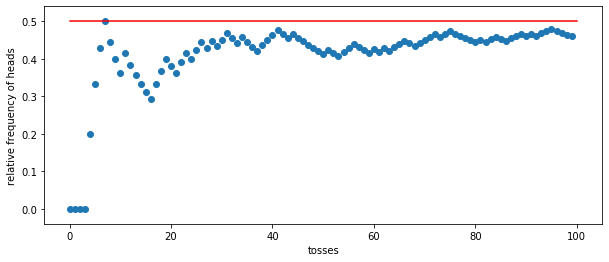

In [3]:
# nbi:hide_in
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 4)

import numpy as np

T = 0
H = 1
outcomes =  np.array([T,T,T,H,H,H,H,T,T,T,H,T,T,T,T,T,H,H,H,T,T,H,H,T,H,
                      H,T,H,T,H,H,T,T,H,T,T,T,H,H,H,H,T,T,H,T,T,T,T,T,T,
                      H,T,T,H,H,H,T,T,T,H,T,H,T,H,H,H,T,T,H,H,H,H,T,H,H,
                      T,T,T,T,T,H,T,H,H,T,T,H,H,H,T,H,T,H,H,H,T,T,T,T,T])

frequencies = np.array([ outcomes[:i].sum()/(i+1) for i in range(100) ])
tosses = np.arange(100)
plt.scatter(tosses, frequencies)
plt.plot([0,100], [0.5,0.5], 'r')
plt.xlabel('tosses')
plt.ylabel('relative frequency of heads')
plt.show();

In the next example, I run the experiment of aimlessly throwing a dart at a square board and compute the frequency at which it lands in the target circle. This time, instead of empirically, I did it numerically. Here the square is taken to be the set $[-2,2]^2$, and the circle to be the one with center at $0$ and radius $1/2$. As could have been expected, the frequency of landing into the target circle is equal to the proportion of its area, and that proportion is equal to $\pi/16$. And as we increase the number of data below, you can see that the 
relative frequency converges to the value that we expect to have (try playing with the slider). 

In [2]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

plt.rcParams["figure.figsize"] = (8, 4)

# generate data
N_samples = 1000
x = np.random.uniform(-1, 1, N_samples)
y = np.random.uniform(-1, 1, N_samples)

# check if in circle
check = (x**2+y**2 <=1/4).astype(int)
frequencies = np.array([ check[:i].sum()/(i+1) for i in range(N_samples) ])

# ploting results
def draw(i=10):
    fig, [ax1, ax2] = plt.subplots(1,2, num=1, clear=True)
    draw_circle = plt.Circle((0, 0), 0.5, facecolor='red')
    draw_square = plt.Rectangle((-1, -1), width=2, height=2, fill=False, zorder=1)
    ax1.add_artist(draw_circle)
    ax1.add_artist(draw_square)
    ax1.set_xlim(-1.1, 1.1)
    ax1.set_ylim(-1.1, 1.1)
    ax1.set_axis_off()
    ax1.title.set_text('dart')
    ax1.scatter(x[:i], y[:i], marker="x", zorder=2)
    
    prob = np.pi/(4*4)
    tosses = np.arange(i)
    ax2.scatter(tosses, frequencies[:i])
    ax2.set_xlabel('throws')
    ax2.set_ylabel('relative frequency')
    ax2.plot([0,N_samples], [prob,prob], 'r')
    plt.tight_layout()
    plt.show()

interact(draw, i=(0,N_samples, 1));

interactive(children=(IntSlider(value=10, description='i', max=1000), Output()), _dom_classes=('widget-interac…

___

**A (deterministic) way to think of randomness and probability: **
    
Imagine the outcome of the experiment depends on the "state" of the factors that determine the outcome ("state of the universe"). In different states, the outcome will be different. The probability of an outcome is the proportion of those states that produce that outcome.
___

The set of events with the associated probabilities is called a **probability space**. As a proportion, the probability of an event is always a number between 0 and 1. However, there are several additional conditions called axioms of probability (introduced by the famous mathematician Vladimir Kolmogorov) that we additionally impose on probability spaces. 

**Definition:** 

<div class="alert alert-block alert-info">



A probability $P$ is any set function (i.e. a function that takes a  set $A$ as input and outputs a number $P(A)$)  satisfying the following conditions:

1. for every event $A$, $P(A)\geq 0$,<br>
2. P(S)=1, <br>
3. for any  (finite or infinite) collection of mutually exclusive events $\{A_1,A_2,\dots\}$,

$$P(A_1\cup A_2\cup\cdots )=P(A_1)+P(A_2)+\cdots.$$

</div>

Note that, the same set of outcomes can have different associated probabilities and thus the resulting probability spaces will be different. For example, if the coin is not fair (because its weight is not evenly distributed or some other reason), then that can affect the probabilities of heads and tails in the coin toss experiment. 





___
**Statistician:** 

Give me data and I will find the probabilities  (e.g. how we did above). The heuristic methods (approach to problem solving that employs a practical method)  I use are consistent with theory but I also rely on empirical evidence (verifiable by observation or experience rather than theory).

**Probability theorist:**

Give me probabilities, doesn't matter how you found them, and I will prove mathematical theorems about them. Sometimes I will also prove theorems justifying the heuristic methods employed by statisticians. 
___

## Basic properties of probability functions

**Theorem:**


<div class="alert alert-block alert-info">


1. $P(A^\prime)=1-P(A)$.<br>
2. $P(\emptyset)=0$. <br>
3. $0\leq P(A)\leq 1$. 

</div>    
    
**Proof:**

1. $A$ and $A^\prime$ are mutually exclusive and $A\cup A^\prime=S$ hence $P(A)+P(A^\prime)=P(S)=1$.
2. The compliment of the empty set is $S$, hence, from 1., $P(\emptyset)=1-P(S)=0$.
3. $P(A)\geq 0$ by definition and $P(A)=1-P(A^\prime)\leq 1$. $\blacksquare$




**Theorem:**


<div class="alert alert-block alert-info">


1. If $A\subseteq B$ then $P(A)\leq P(B)$.
2. For any $A,B$, $$P(A\cup B)= P(A)+P(B)-P(A\cap B).$$

</div>

**Proof:**

1. If $A\subseteq B$ then $A$ and $B\setminus A$ are mutually exclusive and $A\cup (B\setminus A)=B$ (see the Venn diagram below) hence $P(B)=P(A)+P(B\setminus A)\geq P(A)$.\


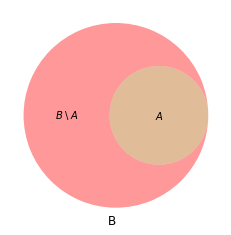

In [10]:
# nbi:hide_in
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
    
v = venn2(subsets = (5, 0, 2), set_labels = ("B",""))
v.get_label_by_id('01').set_text('')
v.get_label_by_id('10').set_text(r'$B\;\backslash \;A$')
v.get_label_by_id('11').set_text(r'$A $')
plt.show()

2. Notice that the following events are mutually exclusive

$$A_1=A\setminus B,\;\; A_2=B\setminus A, \;\;A_3=A\cap B,$$

and     $A\cup B= A_1\cup A_2\cup A_3$ (see the Venn diagram below). Hence

$$P(A\cup B)=P(A\setminus B)+P(B\setminus A)+P(A\cap B)$$

$$=[P(A\setminus B)+P(A\cap B)]+[P(B\setminus A)+P(A\cap B)]-P(A\cap B)$$

$$=P(A)+P(B)-P(A\cap B). \blacksquare$$


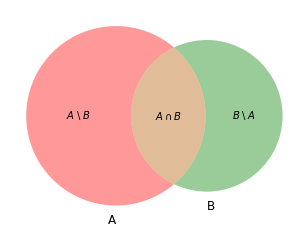

In [4]:
# nbi:hide_in
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
    
v = venn2(subsets = (5, 3, 2), set_labels = ("A","B"))
v.get_label_by_id('10').set_text(r'$A\;\backslash \;B$')
v.get_label_by_id('01').set_text(r'$B\;\backslash \;A$')
v.get_label_by_id('11').set_text(r'$A \cap B$')
plt.show()

## Equiprobability spaces

Let the space of all outcomes $S$ be a finite set: $S=\{s_1,\dots, s_n\}$. Notice that the probability space in this case is uniquely defined by the individual probabilities $p_i=P(s_i)$. 

Indeed, in this case, the probability of an event $A=\{s_{i_1},\dots, s_{i_k}\}$ will be expressed as 

$$P(A) = p_{i_1}+\cdots + p_{i_k}.$$

The simplest probability space on $n$ elements is the one where all $p_i$ are equal, and since $p_1+\cdots +p_n=P(S)=1$ then $p_i=1/n$ for all $i=1,\dots,n$. 

In an equiprobability space, the probability of an event $E$ of size $m$ is equal to $m/n$.

The coin toss experiment with a fair coin is one example of such probability space where $p_1=p_2=1/2.$

Similarly, we can consider equiprobability space on the set of outcomes for two times the coin toss experiment. In this case 
$$S=\{HH, HT, TH, TT\}.$$
And thus the probability of each outcome is $1/4$.

More generally we can consider the problem of $m$ coins tosses with a fair coin. Since it is a fair coin we expect that each combination is equally likely to appear and so we have an equiprobability space on the set of all sequences of length $m$ with each entry being either $T$ or $H$. We will see that in this case, each outcome has $1/2^m$ probability. And we can also pose questions like "what is the probability of the event that the number of heads in $m$ consecutive tosses is $k$ for some given $k$?". To be able to address problems like these we need to use tools from Combinatorics which is a branch of mathematics primarily concerned with counting and arranging.

## Basic combinatorics

Combinatorial techniques use simpler observations to make complicated computations for various arrangement problems. The most basic observation is the principle of multiplication.

**Multiplication principle:**


<div class="alert alert-block alert-info">


If experiment $E_1$ has $n_1$ outcomes and experiment $E_2$ has $n_2$ outcomes, then the number of joint outcomes will be $n_1n_2$.

</div>

Can be easily (inductively) extended to $m$ experiments with corresponding $n_i$ outcomes. Then the joint experiment has $n_1\dots n_m$ outcomes. 


Let us use this principle to compute the number of outcomes of $m$ tosses of a coin. Since each toss has 2 outcomes, then the number of outcomes with $m$ tosses will be $2^m$.

**Definition:**


<div class="alert alert-block alert-info">


A **permutation** of a set is any ordered arrangement of its members.

</div>

For example, the sequences $(1,2,3)$ and $(2,1,3)$ each are permutations of the set $\{1,2,3\}$.

**Theorem:**


<div class="alert alert-block alert-info">


The number of permutations of a set with $n$ elements is equal to $n!$ where $n!$ ("n factorial") denotes the product $n(n-1)\cdots 1.$

</div>

**Proof:**

We will use an observation similar to the principle of multiplication. The first element of the permutation can be selected in $n$ different ways. After the first element is fixed, the second element can be chosen in $n-1$ ways (since we have to exclude the first element) so the first two can be selected in $n(n-1)$ ways. After the first two are fixed, the third one can be selected in $n-2$ ways, and so on. $\blacksquare$

Let $P(n,r)$  be the number of permutations of $n$ objects taken $r$ at a time. In other words, we take all possible r different element combinations from a set of size n and look at their permutations. By a similar argument as above, we can show that 
$$P(n,r)=n(n-1)\cdots (n-r+1)=\frac{n!}{(n-r)!}.$$

**Definition:**


<div class="alert alert-block alert-info">


A **sample of size $r$** from a given set $S$ is any selection of elements from the set. A sample can be unique or with repetitions (the same element is present more than once), it can also be ordered or without order. 

</div>

A sample with unique elements is also called **sample without replacement** whereas a sample with repetitions is called **sample with replacement**. 

We typically use brackets to denote ordered samples and curly brackets to denote samples without order. In that regard $(1,2,3)$ and $(1,3,2)$ are different ordered samples while $\{1,2,3\}$ and $\{1,3,2\}$ are the same as samples without order. 

From the discussion above, the number of all ordered samples of size r sampled without replacement is equal to $P(n,r)$.

**Theorem:**


<div class="alert alert-block alert-info">


The number of all  samples without an order of size r sampled without replacement is denoted by $C(n,r)$ or ${n \choose r}$ and is equal to the following number

$${n \choose r}=\frac{n!}{r!(n-r)!}.$$

</div>
    
**Proof:**

Notice that each sample without order can be ordered in $r!$ ways according to the Theorem about permutations. Hence, using the multiplication principle, $P(n,r)= {n \choose r}r!$ from where we conclude that ${n \choose r}=\frac{P(n,r)}{r!}=\frac{n!}{r!(n-r)!}.$ $\blacksquare$



The number ${n \choose r}$ shows up in many places. Two such examples will be discussed below.

___
**Example 1**

Suppose we have $r$ red balls and $n-r$ blue balls. In how many different ways can arrange the two sets of balls? Below you can see the set of all such arrangements for specific values of $n$ and $r$. Each row corresponds to one arrangement (try playing with the slider).

In [1]:
# nbi:hide_in

import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from ipywidgets import interact

plt.rcParams["figure.figsize"] = (8, 4)

n=6

def redblue(r=2):
    red_list = list(combinations(range(n), r)) 
    N = len(red_list)
    
    fig, ax = plt.subplots()
    for i in range(N):
        y_red = np.ones(r) * i/N
        x_red = np.array(red_list[i])

        y_blue = np.ones(n-r) * i/N
        x_blue = np.array([j for j in range(n) if j not in red_list[i]])

        ax.set_axis_off()
        ax.scatter(x_red, y_red, color='red')
        ax.scatter(x_blue, y_blue, color='blue')
        ax.set_title("All arrangements of {} red and {} blue balls".format(r, n-r))

    plt.show()
    
interact(redblue, r=(0, n, 1));

interactive(children=(IntSlider(value=2, description='r', max=6), Output()), _dom_classes=('widget-interact',)…

Let us notice that there is a one-to-one correspondence between an arrangement of red and blue balls, and the set of samples of size $r$ (without order) from the set $\{1,\dots, n\}$. Indeed, to each arrangement put into correspondence the indices where a red ball is placed. So the arrangement $(R, B, R)$ will correspond to $\{1,3\}$. Since we know that the number of all such samples is ${n \choose r}$ we find the number of all red and blue ball arrangements to be that number as well. 

**Example 2**

Notice that the number of words of length $n$ that can be writen with $r$ letters *a* and $n-r$ letters *b* is also ${n \choose r}$ (replace the letter with a color).


**Example 3**

Another place where the number ${n \choose r}$ shows up is Newton's binome which states that 

$$(a+b)^n=\sum_{r=0}^n {n \choose r}a^rb^{n-r}.$$

**Proof**

Notice that in  $(a+b)^n$, if we maintain the order of terms after expanding the product, then we will have all the words of length $n$ written in $a$ and $b$. For example,
$$(a+b)(a+b)=aa+ab+ba+aa.$$
If we group them according to the number of a-s and b-s, we prove the desired result. 



___

For this reason, ${n \choose r}$-s are also called **binomial coefficients**. 


Similarly, we could consider the problem of arranging $k$ different colored balls. Let $r_1,r_2,\dots, r_k$ be the number of balls of corresponding color and let $n=r_1+\cdots+r_k$. Denote the number of such arrangements by  ${n\choose r_1,\dots,r_k}$. It can be checked that 
the following hold.
1. ${n\choose r_1,\dots,r_k}=\frac{n!}{n_1!\cdots n_k!}.$
2. Just like in the two color case, 
$$(a_1+\cdots + a_k)^n=\sum_{r_1+\cdots+r_k=n} {n\choose r_1,\dots,r_k}a^rb^{n-r}a_1^{r_1}\cdots a_k^{r_k}$$
because of which the ${n\choose r_1,\dots,r_k}$ are also called miltinomial coefficients. Here the summation happens along all different subsets $\{r_1,\dots,r_k\}$ of $\{1,\dots, n\}$ that add up to $n$. $\blacksquare$